# Use of Package: 3 Phase
This notebook uses the py_graspi package modules to compute graph data and generate graph data for 3-phase morphology files. It also benchmarks the time and memory usage for the graph generation and descriptor calculation. Additionally, it compares computed descriptor values against expected computer descriptor values when available.

The cell below is setting up the environment. It imports the necessary modules and adds the 'src' path so that modules can be imported as needed.


In [1]:
import sys
import os
import tracemalloc
import importlib
import time
from py_graspi import descriptors as ds
from py_graspi import graph as ig

current_dir = os.getcwd()
src_path = os.path.abspath(os.path.join(current_dir, "../src"))
sys.path.append(src_path)

#Reload the module in case source code was edited.
importlib.reload(ig);
importlib.reload(ds);

This cell prepares the file paths and variables needed to store results. It contains the filepaths where the necessary morphology files and expected result log files exist. The data path and results path can be manually adjusted as necessary.

In [2]:
current_dir = os.getcwd()
data_path = f"../data/3phase/2D-testFiles/"
results_path = f"../data/2phase/2D-morphologies/expected_results/"
test_files = [os.path.splitext(file)[0] for file in os.listdir(data_path)]
epsilon = 1e-5

times = []
mems = []
time_mem_stats = {}

This cell loops through the valid .txt morphology files found in the directory specified by the data path above. For each file, it measures the time/memory needed to compute the graph data and corresponding descriptors. It then visualises the graph, and will compare expected results if they are available in the given results path.

testFile-5x13-2D Results
STAT_e : 0
cannot calculate other descriptors



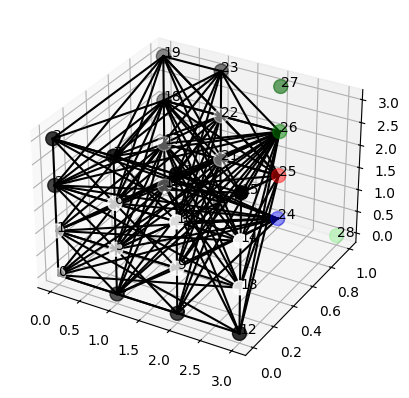

testFile-13x5-2D Results
STAT_e : 0
cannot calculate other descriptors



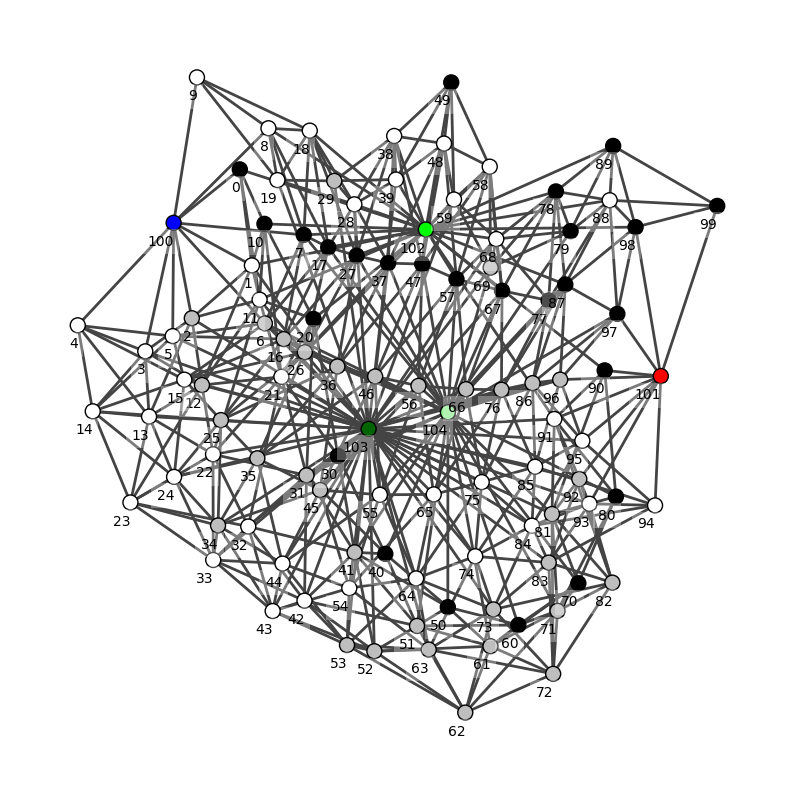

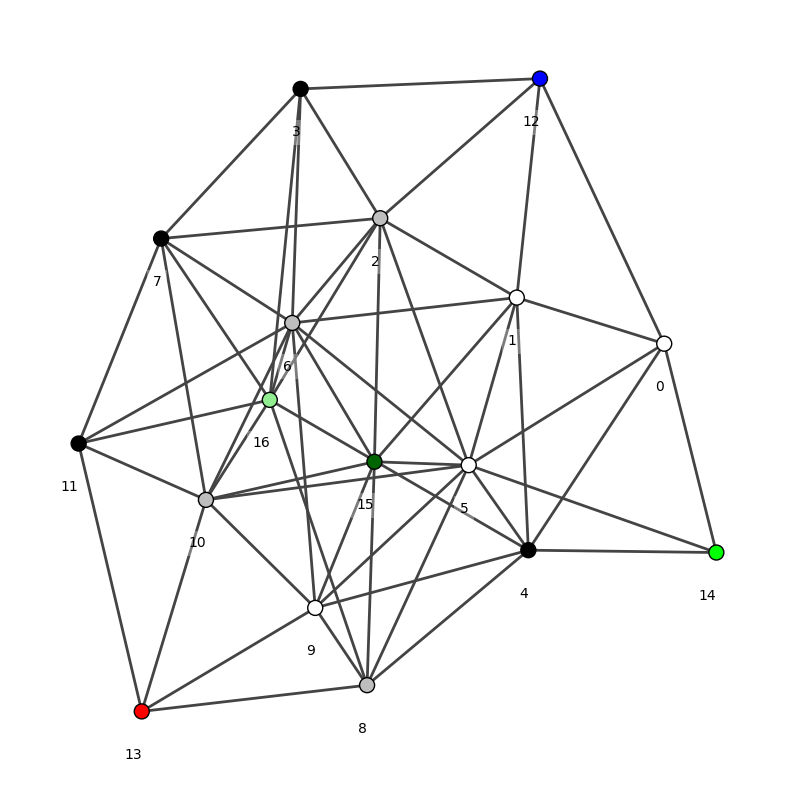

In [3]:
for test_file in test_files:
    import time
    tracemalloc.start()
    graph_start = time.time()
    g_data = ig.generateGraph(data_path+test_file+".txt")
    mem_graph = tracemalloc.get_traced_memory()
    graph_end = time.time()
    tracemalloc.stop()
    graph_mem = mem_graph[1]-mem_graph[0]

    if g_data.black_green == 0:
        print(f"{test_file} Results")
        print("STAT_e : 0")
        print("cannot calculate other descriptors")
        print("")
        continue
    tracemalloc.start()
    desc_start = time.time()
    stats = ds.compute_descriptors(g_data, test_file+".txt", 1)
    mem_desc = tracemalloc.get_traced_memory()
    desc_end = time.time()
    tracemalloc.stop()
    descriptor_time = desc_end - desc_start
    descriptor_mem = mem_desc[1]-mem_desc[0]
    ig.visualize(g_data.graph, g_data.is_2D)

This is a debug check to see if there are any missing vertex or edge colors. If debug mode is set on by toggling the debug boolean variable, then debug messages will print as appropriate. Else, they will not be scanned for and outputted. This can be toggled as needed by changing the debug variable to true for on and false for off.

In [4]:
    debug = False
    if debug:
        for idx, v in enumerate(g_data.graph.vs):
            color = v.attributes().get("color")
            if color is None:
                print(f"[DEBUG] Vertex {idx} has no 'color' attribute.")
            elif color == "":
                print(f"[DEBUG] Vertex {idx} has empty 'color' string.")

        for idx, e in enumerate(g_data.graph.es):
            color = e.attributes().get("color")
            if color is None:
                print(f"[DEBUG] Edge {idx} has no 'color' attribute.")
            elif color == "":
                print(f"[DEBUG] Edge {idx} has empty 'color' string.")

The following cell goes through each expected descriptor and tries to compare against a log file with expected computed values with an error margin within epilson. If no corresponding log file is found, it prints STAT_e instead.

In [ ]:
    print(f"{test_file} Results")
    try:
        with open(results_path + "descriptors." + test_file + ".log") as f:
            for line in f:
                stat = line.strip().split(" ")
                try:
                    #if stats.get(stat[0], -1) == int(stat[1]):
                    if abs(stats.get(stat[0], -1) - float(stat[1])) < epsilon:
                        print(f"{stat[0]} passed")
                    elif stats.get(stat[0], -1) != -1 and stats.get(stat[0], -1) != int(stat[1]):
                        print(f"{stat[0]} failed - {stats.get(stat[0])} is not the same as expected {stat[1]}")
                except ValueError:
                    if abs(stats.get(stat[0], -1) - float(stat[1])) < epsilon:
                        print(f"{stat[0]} passed")
                    elif stats.get(stat[0], -1) != -1 and stats.get(stat[0], -1) != float(stat[1]):
                        print(f"{stat[0]} failed - {stats.get(stat[0])} is not the same as expected {stat[1]}")

    except FileNotFoundError:
        for key in stats:
            if key == "STAT_e":
                print(f"{key}: {stats[key]}")
                print("")

The following cell is storing the time and memory stats.

In [10]:
    times.append(descriptor_time)
    mems.append(descriptor_mem)

    graph_time = graph_end-graph_start
    print(f"Graph generation time: {graph_time:.2f} s")
    print(f"Descriptor calculation time: {descriptor_time:.2f} s")
    print(f"Peak memory usage for graph: {graph_mem / 1024:.2f} KB")
    print(f"Peak memory usage for descriptors: {descriptor_mem / 1024:.2f} KB")
    print(stats)
    print("")
    time_mem_stats[test_file] = {"graph_time": graph_time, "descriptor_time": descriptor_time,  "graph_mem":graph_mem, "descriptor_mem": descriptor_mem}



testFile-4x3-2D Results
STAT_e: 2

Graph generation time: 0.01 s
Descriptor calculation time: 0.01 s
Peak memory usage for graph: 27.98 KB
Peak memory usage for descriptors: 11.54 KB
{'STAT_n': 8, 'STAT_e': 2, 'STAT_n_D': 4, 'STAT_n_A': 4, 'STAT_CC_D': 2, 'STAT_CC_A': 1, 'STAT_CC_D_An': 1, 'STAT_CC_A_Ca': 1, 'ABS_wf_D': 0.496268687655938, 'ABS_f_D': 0.5, 'DISS_f10_D': 0.25, 'DISS_wf10_D': 0.24061355122883468, 'CT_f_e_conn': 0.0, 'CT_f_conn_D_An': 0.75, 'CT_f_conn_A_Ca': 1.0, 'CT_e_conn': 0, 'CT_e_D_An': 0, 'CT_e_A_Ca': 4, 'CT_n_D_adj_An': 1, 'CT_n_A_adj_Ca': 2, 'CT_f_D_tort1': 1.0, 'CT_f_A_tort1': 1.0}

